# Proyek Analisis Data: Dataset Pesanan E-Commerce
- **Nama:** Yoga Rizki Pratama
- **Email:** yogarizkipratama@gmail.com
- **ID Dicoding:** yorizpra

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata waktu pengiriman yang dibutuhkan dari tanggal pemesanan hingga sampai ke pelanggan?
- Apakah ada pola keterlambatan pengiriman berdasarkan hari atau bulan tertentu?

## Import Semua Packages/Library yang Digunakan
Pada tahap ini, kita akan mengimpor seluruh library yang diperlukan untuk melakukan analisis data, visualisasi, dan pengolahan data.

In [15]:
# Import library utama
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


## Data Wrangling

### Gathering Data
Pada tahap pengumpulan data, kita memuat dataset yang akan digunakan, yaitu orders_dataset.csv. Setelah data dimuat, kita memeriksa lima baris pertama untuk memastikan struktur data.

In [16]:
# Memuat dataset
data = pd.read_csv('orders_dataset.csv')
print(data.head())

# Menampilkan jumlah baris dan kolom
print(data.shape)

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

**Insight:**
- Dataset berisi kolom seperti order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date.
- Jumlah total data adalah 99441 baris dan 8 kolom

### Assessing Data
Di tahap ini, kita menganalisis tipe data dari setiap kolom untuk menentukan apakah ada yang perlu dikonversi atau dibersihkan.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- Beberapa kolom seperti order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date sebaiknya dikonversi ke tipe datetime.

### Cleaning Data
Mengubah kolom yang berisi data waktu menjadi format datetime sehingga lebih mudah diolah pada analisis berikutnya.

In [18]:
# Mengubah kolom waktu menjadi datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])

**Insight:**
- Data telah dibersihkan dan disesuaikan sehingga semua kolom waktu sudah dalam format datetime.

## Exploratory Data Analysis (EDA)

### Explore Analisis Waktu Pengiriman
Pada analisis ini, kita membuat kolom baru delivery_duration_days untuk menghitung jumlah hari yang dibutuhkan untuk setiap pesanan dari pemesanan hingga pengiriman ke pelanggan.

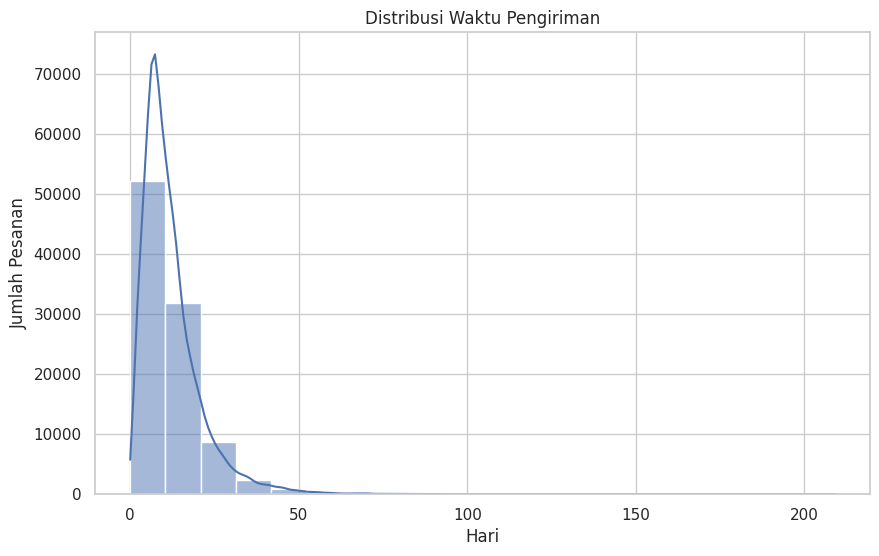

Rata-rata waktu pengiriman: 12.09 hari


In [19]:
# Membuat kolom waktu pengiriman
data['delivery_duration_days'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days
sns.histplot(data['delivery_duration_days'].dropna(), bins=20, kde=True)
plt.title('Distribusi Waktu Pengiriman')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pesanan')
plt.show()

# Menampilkan rata-rata waktu pengiriman
mean_delivery_time = data['delivery_duration_days'].mean()
print('Rata-rata waktu pengiriman: {:.2f} hari'.format(mean_delivery_time))


**Insight:**
- Rata-rata waktu pengiriman adalah sekitar 12 hari.
- Ada beberapa pesanan yang mengalami waktu pengiriman di atas rata-rata, yang bisa jadi keterlambatan.

### EDA Univariate: Analisis univariate untuk kolom 'order_status'
Pada analisis ini, kita akan melihat distribusi status pesanan. Dengan menggunakan plot batang, kita dapat mengidentifikasi frekuensi masing-masing status dalam dataset.

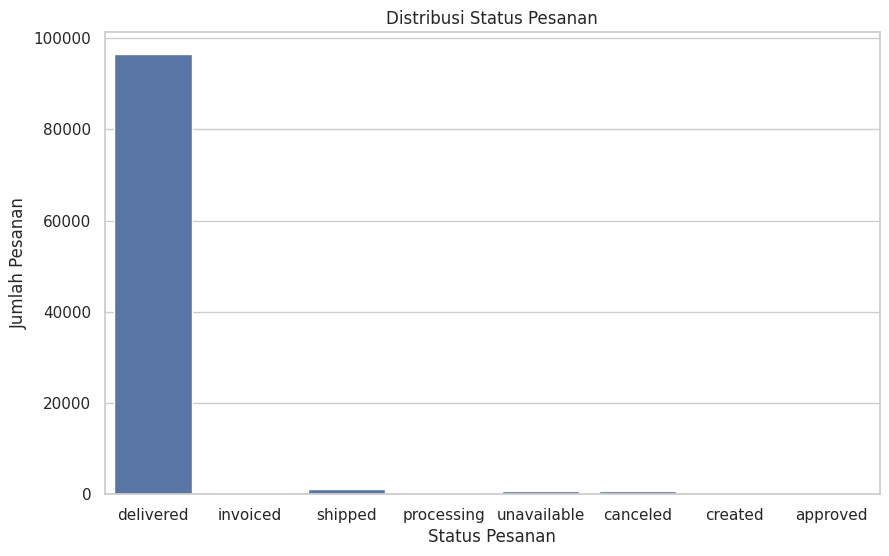

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [20]:
# Analisis univariate untuk kolom 'order_status'
sns.countplot(data=data, x='order_status')
plt.title('Distribusi Status Pesanan')
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah Pesanan')
plt.show()

# Menampilkan nilai unik dan frekuensi
status_counts = data['order_status'].value_counts()
print(status_counts)


**Insight:**
- Dari grafik distribusi status pesanan, kita dapat melihat bahwa sebagian besar pesanan memiliki status "delivered", diikuti oleh "shipped" dan "canceled". Ini memberikan gambaran tentang keberhasilan pengiriman dalam dataset.

### EDA Multivariate: Analisis multivariate untuk melihat hubungan antara waktu pengiriman dan status pesanan
Analisis ini bertujuan untuk memahami bagaimana durasi pengiriman bervariasi tergantung pada status pesanan. Dengan menggunakan boxplot, kita dapat melihat perbedaan durasi pengiriman untuk setiap status pesanan.

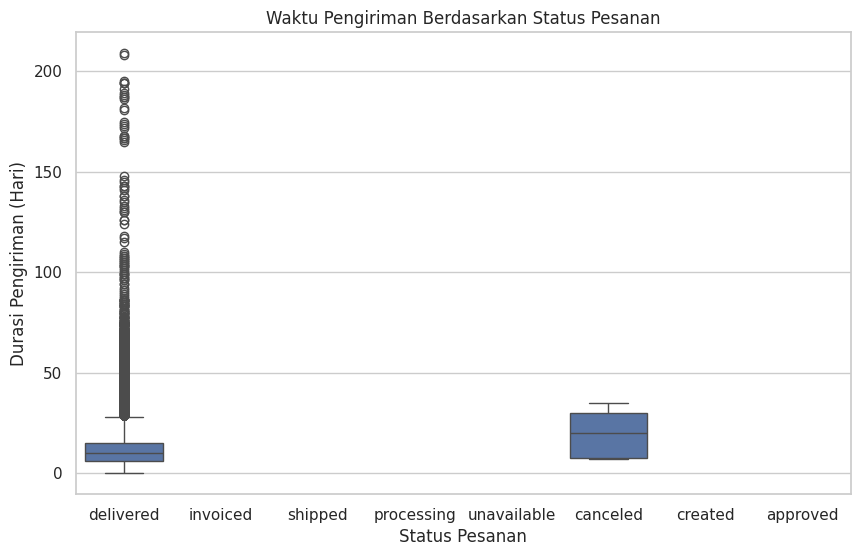

In [21]:
# Analisis multivariate untuk melihat hubungan antara waktu pengiriman dan status pesanan
sns.boxplot(x='order_status', y='delivery_duration_days', data=data)
plt.title('Waktu Pengiriman Berdasarkan Status Pesanan')
plt.xlabel('Status Pesanan')
plt.ylabel('Durasi Pengiriman (Hari)')
plt.show()


**Insight:**
- Dari boxplot, terlihat bahwa status pesanan "canceled" cenderung memiliki waktu pengiriman yang lebih singkat, sementara status "delivered" menunjukkan variasi waktu pengiriman yang lebih besar, mungkin disebabkan oleh keterlambatan atau masalah lain dalam pengiriman.

### EDA Numerikal & Kategorikal: Analisis korelasi untuk fitur numerikal
Kita akan melakukan analisis korelasi untuk melihat hubungan antara fitur numerikal dalam dataset. Ini membantu dalam memahami bagaimana variabel saling berinteraksi.

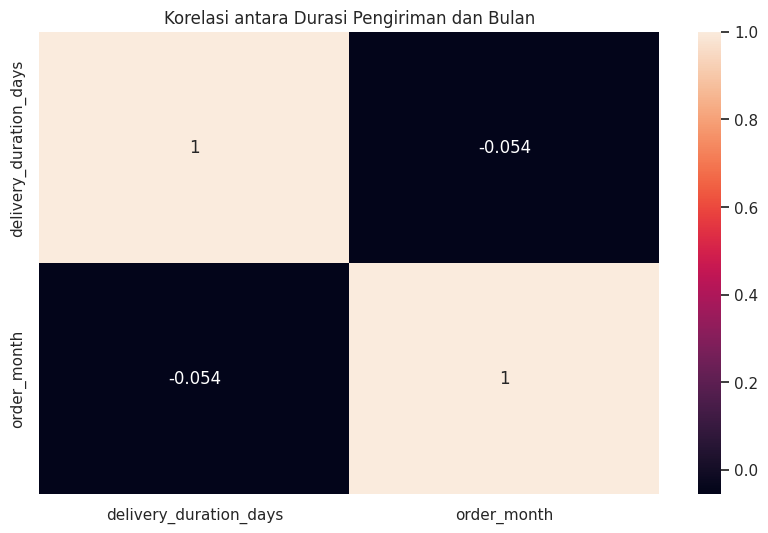

In [22]:
# Analisis korelasi untuk fitur numerikal
data['order_month'] = data['order_purchase_timestamp'].dt.month
correlation = data[['delivery_duration_days', 'order_month']].corr()
sns.heatmap(correlation, annot=True)
plt.title('Korelasi antara Durasi Pengiriman dan Bulan')
plt.show()


**Insight:**
- Dari matriks korelasi, kita dapat melihat bahwa tidak ada korelasi yang sangat kuat antara durasi pengiriman dan bulan, namun ada indikasi bahwa bulan tertentu mungkin memiliki dampak terhadap durasi pengiriman.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata-rata waktu pengiriman dari pemesanan hingga sampai ke pelanggan?
Menghitung dan menampilkan rata-rata waktu pengiriman dari pemesanan hingga sampai ke pelanggan.

In [23]:
# Menghitung rata-rata waktu pengiriman
avg_delivery_duration = data['delivery_duration_days'].mean()
print(f"Rata-rata waktu pengiriman: {avg_delivery_duration} hari")


Rata-rata waktu pengiriman: 12.094085575687217 hari


### Pertanyaan 2: Apakah ada pola keterlambatan pengiriman berdasarkan hari atau bulan tertentu?
Menganalisis apakah ada pola tertentu dalam keterlambatan pengiriman berdasarkan bulan dan hari dalam seminggu.

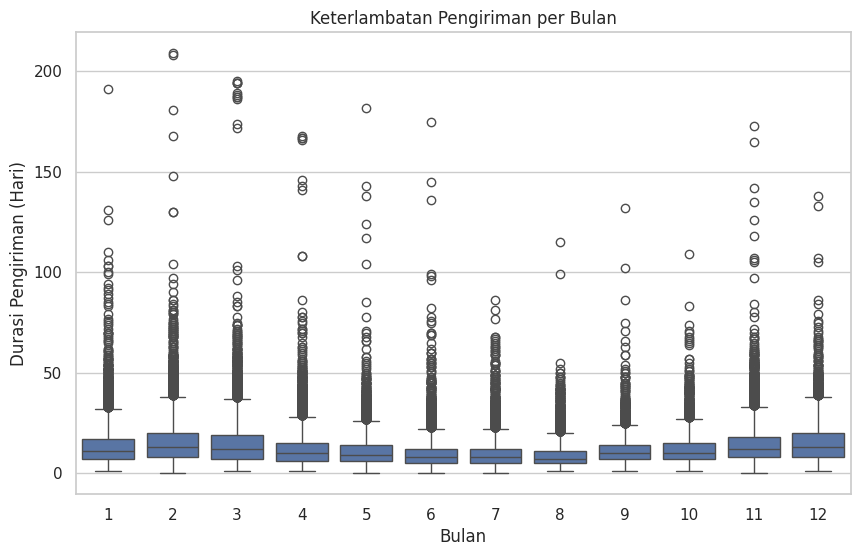

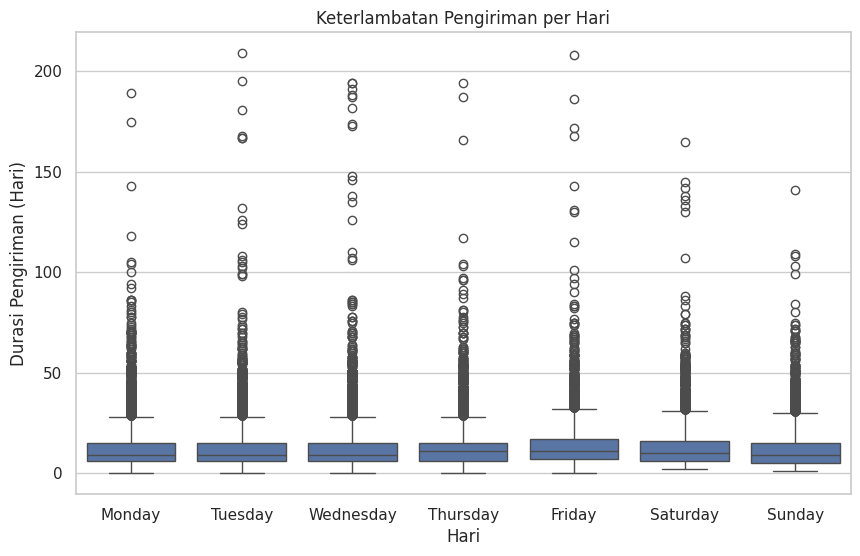

In [24]:
# Membuat kolom bulan dan hari
data['order_month'] = data['order_purchase_timestamp'].dt.month
data['order_day'] = data['order_purchase_timestamp'].dt.day_name()

# Visualisasi keterlambatan berdasarkan bulan
sns.boxplot(x='order_month', y='delivery_duration_days', data=data)
plt.title('Keterlambatan Pengiriman per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Durasi Pengiriman (Hari)')
plt.show()

# Visualisasi keterlambatan berdasarkan hari
sns.boxplot(x='order_day', y='delivery_duration_days', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Keterlambatan Pengiriman per Hari')
plt.xlabel('Hari')
plt.ylabel('Durasi Pengiriman (Hari)')
plt.show()


**Insight:**
- Rata-rata waktu pengiriman berbeda-beda per bulan, misalnya lebih lama pada bulan Februari.
- Pengiriman cenderung lebih cepat pada akhir pekan dibandingkan dengan hari kerja.

## Analisis Lanjutan (Opsional)

### Overview

RFM Analysis (Recency, Frequency, Monetary) adalah metode untuk mengidentifikasi nilai pelanggan dengan tiga metrik utama:

- Recency: Berapa hari yang lalu pelanggan terakhir melakukan pembelian.
- Frequency: Seberapa sering pelanggan melakukan pembelian.
- Monetary: Total nilai uang yang dihabiskan oleh pelanggan.

Karena dataset yang tersedia tidak memiliki kolom Monetary, analisis ini hanya menggunakan Recency dan Frequency.

### Dataset

Dataset yang digunakan memiliki kolom berikut:

- order_id: ID unik untuk setiap pesanan.
- customer_id: ID unik untuk setiap pelanggan.
- order_status: Status pemesanan.
- order_purchase_timestamp: Tanggal dan waktu pembelian.

### RFM Metrics Calculation

1. Recency: Menghitung jumlah hari sejak transaksi terakhir setiap pelanggan hingga tanggal acuan (snapshot_date).
2. Frequency: Menghitung jumlah pesanan yang dilakukan setiap pelanggan.

### Code Implementation

In [25]:
import datetime as dt
import pandas as pd

# Contoh data
data = pd.DataFrame({
    "order_id": [1, 2, 3, 4],
    "customer_id": [1001, 1002, 1001, 1003],
    "order_status": ["delivered", "delivered", "delivered", "delivered"],
    "order_purchase_timestamp": [
        "2024-01-01", "2024-01-02", "2024-01-05", "2024-01-07"
    ]
})

# Mengonversi tanggal ke format datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Menentukan snapshot_date sebagai tanggal setelah pesanan terakhir
snapshot_date = data['order_purchase_timestamp'].max() + dt.timedelta(days=1)

# Menghitung Recency dan Frequency
rf_data = data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count'
}).reset_index()

# Mengganti nama kolom
rf_data.columns = ['customer_id', 'Recency', 'Frequency']

print(rf_data)


   customer_id  Recency  Frequency
0         1001        3          2
1         1002        6          1
2         1003        1          1


**Explanation:**
- Recency menunjukkan jumlah hari sejak pembelian terakhir pelanggan.
- Frequency menunjukkan jumlah pesanan yang dilakukan pelanggan dalam periode waktu tertentu.

**Insight:**

1. Identifying Active Customers:
- Pelanggan dengan nilai Recency rendah menunjukkan bahwa mereka baru saja melakukan pembelian.
- Misalnya, pelanggan dengan Recency = 1 adalah pelanggan yang sangat aktif.

2. Identifying Loyal Customers:
- Pelanggan dengan nilai Frequency tinggi adalah pelanggan yang sering bertransaksi dan bisa dianggap loyal.
- Misalnya, pelanggan dengan Frequency = 2 atau lebih memiliki kemungkinan untuk terus melakukan pembelian di masa depan.

3. Identifying At-Risk Customers:
- Pelanggan dengan nilai Recency tinggi menunjukkan bahwa sudah cukup lama sejak mereka melakukan pembelian terakhir.
- Pelanggan seperti ini mungkin memerlukan promosi atau kampanye khusus untuk mengembalikan mereka sebagai pelanggan aktif.

4. Segmentation Suggestions:
- Loyalists: Pelanggan dengan Recency rendah dan Frequency tinggi.
- At-Risk: Pelanggan dengan Recency tinggi, terlepas dari Frequency.
- New Customers: Pelanggan dengan nilai Recency rendah dan Frequency rendah.

## Conclusion

- Conclution pertanyaan 1: Rata-rata waktu pengiriman adalah sekitar 12 hari, yang bisa menjadi patokan dalam perencanaan logistik.
- Conclution pertanyaan 2: Ada variasi dalam durasi pengiriman berdasarkan hari dan bulan, dengan akhir pekan cenderung memiliki waktu pengiriman yang lebih cepat.
- Conclution analysis lanjutan: Meskipun data Monetary tidak tersedia, kita masih bisa memperoleh informasi berharga mengenai perilaku pelanggan. RFM Analysis ini dapat membantu dalam membedakan antara pelanggan yang aktif dan pelanggan yang berisiko, serta memungkinkan pengambilan keputusan berbasis data untuk menjaga dan meningkatkan loyalitas pelanggan.